In [5]:
import pandas as pd
adjMatrix = pd.read_csv('adjMatrix.csv', encoding='utf-8')
print(adjMatrix.columns)

Index(['Unnamed: 0', '경기도', '함양군', '충청남도', '충청북도', '대전광역시', '경상북도', '대구광역시',
       '울산광역시', '양산시', '부산광역시', '함안군', '창원시', '김해시', '전라북도', '전라남도', '강원도',
       '산청군', '진주시', '창녕군', '합천군', '광주광역시', '거창군', '하동군', '사천시', '고성군', '통영시',
       '세종특별자치시', '밀양시'],
      dtype='object')


In [6]:
# restore its format
adjMatrix = adjMatrix.rename(columns={'Unnamed: 0':'지명'})
adjMatrix = adjMatrix.set_index('지명')
adjMatrix.head()

,경기도,함양군,충청남도,충청북도,대전광역시,경상북도,대구광역시,울산광역시,양산시,부산광역시,...,창녕군,합천군,광주광역시,거창군,하동군,사천시,고성군,통영시,세종특별자치시,밀양시
지명,,,,,,,,,,,,,,,,,,,,,
경기도,0.00,461.50,0.00,0.00,0.0,0.00,0.0,0.00,58.75,0.0,...,479.25,18.75,0.0,101.25,74.5,420.00,155.00,841.75,0.0,10.25
함양군,419.75,595.75,195.75,91.75,254.5,178.25,329.0,22.75,13.75,117.0,...,20.00,16.50,143.0,272.75,23.0,118.75,28.00,92.00,27.5,0.00
충청남도,0.00,176.25,0.00,0.00,0.0,0.00,0.0,0.00,27.75,0.0,...,116.25,3.50,0.0,36.50,139.0,160.50,49.00,292.00,0.0,1.75
충청북도,0.00,102.50,0.00,0.00,0.0,0.00,0.0,0.00,15.75,0.0,...,188.75,11.25,0.0,36.25,54.0,122.00,35.75,190.25,0.0,0.50
대전광역시,0.00,233.25,0.00,0.00,0.0,0.00,0.0,0.00,14.75,0.0,...,82.00,3.25,0.0,35.25,55.0,216.00,60.75,354.25,0.0,0.25


In [7]:
# total traffic in each region will be set to the size of nodes
totalTraff = adjMatrix.sum(axis='columns')
print(type(totalTraff))
totalTraff

<class 'pandas.core.series.Series'>


지명
경기도          6976.75
함양군          5001.25
충청남도         2424.50
충청북도         2122.50
대전광역시        2232.25
경상북도        17309.25
대구광역시       30477.50
울산광역시       22032.25
양산시         58086.00
부산광역시       83339.75
함안군         55858.00
창원시         36911.50
김해시        204033.25
전라북도         5143.75
전라남도        10665.00
강원도           253.00
산청군          5538.00
진주시         31413.50
창녕군          8540.25
합천군          2798.75
광주광역시        2102.75
거창군          7223.75
하동군          9267.25
사천시         18993.00
고성군         12907.75
통영시         15509.25
세종특별자치시       379.25
밀양시         34645.25
dtype: float64

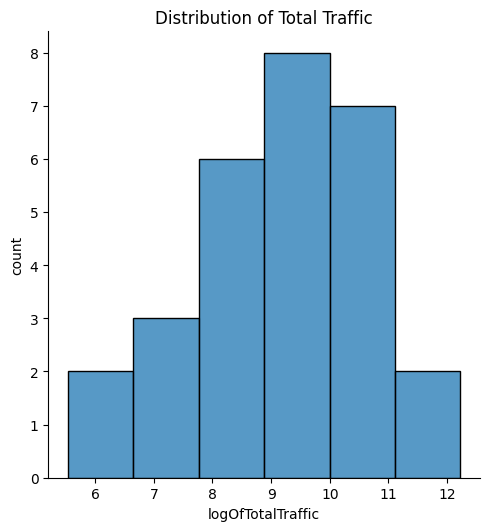

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.displot(np.log(totalTraff.values.flatten())) 
plt.xlabel('logOfTotalTraffic')
plt.ylabel('count')
plt.title('Distribution of Total Traffic')
plt.show() # ~ normalized

In [9]:
# split it into 경상남도 and the others
# prepare lists of their names
gyeongnam = ['거창군', '고성군', '사천시', '김해시', '함안군', '밀양시', '양산시', '창녕군', '산청군',
       '창원시', '진주시', '통영시', '함양군', '하동군', '합천군']
others = ['부산광역시', '경상북도', '충청북도', '강원도', '전라남도', '경기도', '충청남도', '전라북도',
       '광주광역시', '대구광역시', '대전광역시', '세종특별자치시', '울산광역시']

In [10]:
# and split the totalTraff series into two
gyeongnamTraff = totalTraff[gyeongnam]
othersTraff = totalTraff[others]
gyeongnamTraff

지명
거창군      7223.75
고성군     12907.75
사천시     18993.00
김해시    204033.25
함안군     55858.00
밀양시     34645.25
양산시     58086.00
창녕군      8540.25
산청군      5538.00
창원시     36911.50
진주시     31413.50
통영시     15509.25
함양군      5001.25
하동군      9267.25
합천군      2798.75
dtype: float64

In [11]:
# sort two series by values in the ascending order
gTraffSorted = gyeongnamTraff.sort_values(ascending=True)
gTraffSortedV = gTraffSorted.values.flatten()
print('gyeongnam traffic sorted :\n',gTraffSortedV)

oTraffSorted = othersTraff.sort_values(ascending=True)
oTraffSortedV = oTraffSorted.values.flatten()
print('others traffic sorted :\n',oTraffSortedV)

gyeongnam traffic sorted :
 [  2798.75   5001.25   5538.     7223.75   8540.25   9267.25  12907.75
  15509.25  18993.    31413.5   34645.25  36911.5   55858.    58086.
 204033.25]
others traffic sorted :
 [  253.     379.25  2102.75  2122.5   2232.25  2424.5   5143.75  6976.75
 10665.   17309.25 22032.25 30477.5  83339.75]


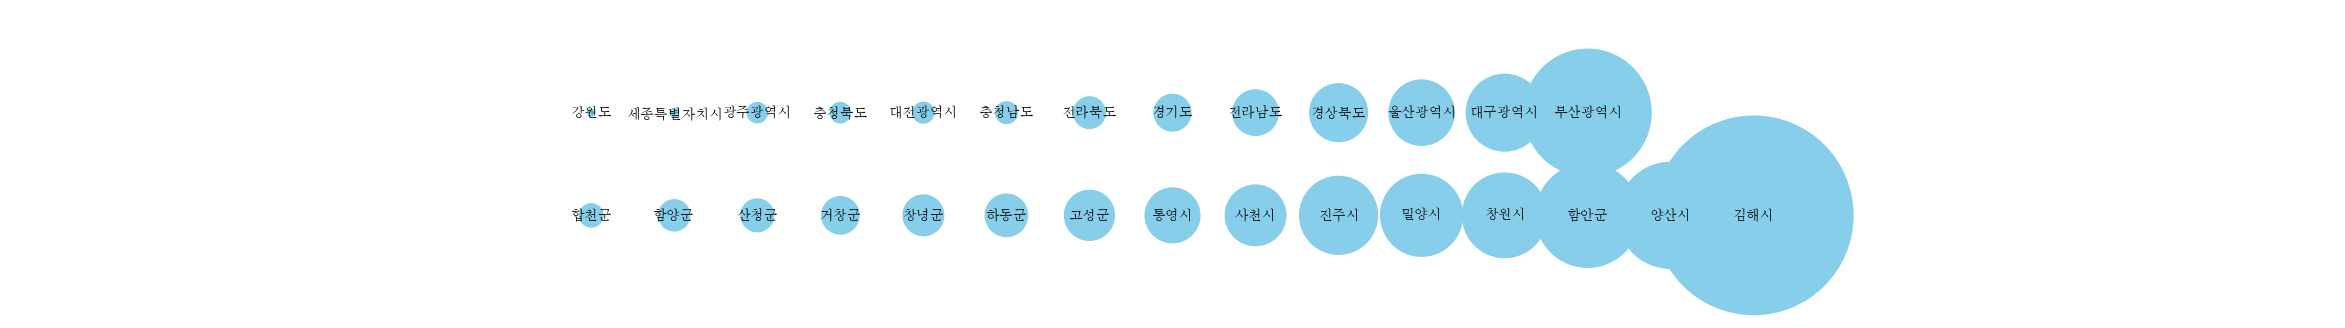

In [12]:
import networkx as nx

G = nx.Graph()
# group elements
upper_nodes = gTraffSorted.index
bottom_nodes = oTraffSorted.index
# add nodes
G.add_nodes_from(upper_nodes)
G.add_nodes_from(bottom_nodes)
# set their poisition
pos = {val: (idx*2, 0) for idx, val in enumerate(upper_nodes)}
pos.update({val: (idx*2, 1.5) for idx, val in enumerate(bottom_nodes)})

sizeList = np.concatenate([gTraffSorted.values, oTraffSorted.values])

plt.figure(figsize=(30,4))
plt.margins(0.5,1)
nx.draw(G, with_labels=True, pos=pos, node_size=sizeList/10 ,font_family='Batang', node_color='skyblue', font_size=10)
plt.savefig('nodesWithSize.png')

In [13]:
# store 경상남도 data for later use
gTraffSorted.to_csv('gTraffSorted.csv', index=True)

In [14]:
oTraffSorted.to_csv('oTraffSorted.csv', index=True)

In [ ]:
# end of the code